In [43]:
import sqlite3
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

import folium
from math import radians, sin, cos, sqrt, atan2

In [44]:
db_file = "nuremberg_stops_immoscout.sqlite"
table_immoscout = "immoscout"
table_nuremberg_stops = "nuremberg_stops"

df_immoscout = None
df_nuremberg_stops =None

In [45]:
# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Fetch and print the data from 'parking_violations'
cursor = conn.execute(f'SELECT * FROM {table_immoscout}')

data_immoscout = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Create a DataFrame from the results and column names
df_immoscout = pd.DataFrame(data_immoscout, columns=column_names)

In [46]:
cursor = conn.execute(f'SELECT * FROM {table_nuremberg_stops}')

data_nuremberg_stops = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Create a DataFrame from the results and column names
df_nuremberg_stops = pd.DataFrame(data_nuremberg_stops, columns=column_names)
conn.close()

In [47]:
df_immoscout.columns

Index(['federalState', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'houseNumber', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange',
       'typeOfFlat', 'zipCode', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'district', 'cityTown', 'description', 'facilities', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice', 'date', 'latitude', 'longitude'],
      dtype='object')

In [48]:
df_immoscout.head(5)

federalState  serviceCharge      heatingType telekomTvOffer  \
0       Bayern         120.00  central_heating  ONE_YEAR_FREE   
1       Bayern         130.88  central_heating  ONE_YEAR_FREE   
2       Bayern         220.00                0  ONE_YEAR_FREE   
3       Bayern          80.00                0  ONE_YEAR_FREE   
4       Bayern          80.00  central_heating  ONE_YEAR_FREE   

   telekomHybridUploadSpeed  newlyConst  balcony  pricetrend  \
0                       0.0           0        1        5.49   
1                       0.0           0        1        6.67   
2                      10.0           0        1        5.21   
3                       0.0           0        0        4.40   
4                       0.0           0        1        5.15   

   telekomUploadSpeed  totalRent  ...  \
0                40.0     720.00  ...   
1                40.0     843.88  ...   
2                10.0    1015.79  ...   
3                40.0     640.00  ...   
4                40.0    1624.60  ...   

                                         description  \
0  Bei diesem Objekt handelt es sich um ein renov...   
1  Modernes Citywohnen - lebenswert und zentral!\...   
2  Die großzügige 3-Zimmerwohnung befindet sich i...   
3  sie finden hier eine neu renovierte, helle 3-Z...   
4  Diese Mansarden-Wohnung in der vierten Etage z...   

                                          facilities heatingCosts  \
0  - Bad mit Dusche und Fenster\n- Linoleumböden\...          0.0   
1  + Hochwertige Möblierung \n+ Lichtdurchflutete...          0.0   
2  Die 3-Zimmerwohnung ist ausgestattet mit: \n\r...        100.0   
3  Laminatboden in Schlafzimmer, Wohnzimmer und K...          0.0   
4  Bad, Küche, WC jeweils am Fußboden mit Holz im...        125.0   

   energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0                      B         2017.0                  0.00   
1                      0            0.0                  0.00   
2                      0            0.0                  0.00   
3                      0            0.0                 90.76   
4                      0         2018.0                 90.76   

   electricityKwhPrice   date   latitude  longitude  
0               0.0000  Feb20        NaN        NaN  
1               0.0000  May19        NaN        NaN  
2               0.0000  May19  49.456003  11.092123  
3               0.1915  Sep18        NaN        NaN  
4               0.1915  Sep18        NaN        NaN  

[5 rows x 47 columns]

MAX/MIN/Mean Rent w.r.t Area

In [49]:
print("MAX Rent",df_immoscout['totalRent'].max(), "Euros")
print("2nd MAX Rent",df_immoscout['totalRent'].nlargest(2).iloc[-1], "Euros")

print("MIN Rent",df_immoscout['totalRent'].min(), "Euros")
print("2nd MIN Rent",df_immoscout['totalRent'].nsmallest(2).iloc[-1], "Euros")
print("MEAN Rent",df_immoscout['totalRent'].mean(), "Euros")

print("=============================================")
print("MAX Space",df_immoscout['livingSpace'].max(), "Sq-Meter")
print("MIN Space",df_immoscout['livingSpace'].min(), "Sq-Meter")
print("MEAN Space",df_immoscout['livingSpace'].mean(), "Sq-Meter")

MAX Rent 4195.0 Euros
2nd MAX Rent 3380.0 Euros
MIN Rent 0.0 Euros
2nd MIN Rent 0.0 Euros
MEAN Rent 771.8260937499999 Euros
MAX Space 309.68 Sq-Meter
MIN Space 10.0 Sq-Meter
MEAN Space 69.70726004464287 Sq-Meter


In [50]:
df_nuremberg_stops.columns

Index(['VAGIdentifier', 'VAGIdentifierChar', 'stopName', 'latitude',
       'longitude'],
      dtype='object')

In [51]:
df_nuremberg_stops.head(5)

VAGIdentifier VAGIdentifierChar          stopName   latitude  longitude
0            101                WT       Weißer Turm  49.450071  11.070433
1            101                WT       Weißer Turm  49.449634  11.068995
2            148            WEINTR  Weintraubengasse  49.454224  11.073774
3            148            WEINTR  Weintraubengasse  49.454395  11.073731
4            149            EGID-P      Egidienplatz  49.455715  11.082086

In [52]:
#unique Street Names in immoscout data
streets = df_immoscout['cityTown'].unique()
print(len(streets))

81


In [53]:
#unique Street Names in nuremberg_stops data
stops = df_nuremberg_stops['stopName'].unique()
print(len(stops))

1244


In [54]:
# Check for None values in latitude column and replace with mean value
mean_latitude = df_immoscout['latitude'].mean()
df_immoscout['latitude'].fillna(mean_latitude, inplace=True)

# Check for None values in longitude column and replace with mean value
mean_longitude = df_immoscout['longitude'].mean()
df_immoscout['longitude'].fillna(mean_longitude, inplace=True)


In [55]:
df_immoscout.head(5)

federalState  serviceCharge      heatingType telekomTvOffer  \
0       Bayern         120.00  central_heating  ONE_YEAR_FREE   
1       Bayern         130.88  central_heating  ONE_YEAR_FREE   
2       Bayern         220.00                0  ONE_YEAR_FREE   
3       Bayern          80.00                0  ONE_YEAR_FREE   
4       Bayern          80.00  central_heating  ONE_YEAR_FREE   

   telekomHybridUploadSpeed  newlyConst  balcony  pricetrend  \
0                       0.0           0        1        5.49   
1                       0.0           0        1        6.67   
2                      10.0           0        1        5.21   
3                       0.0           0        0        4.40   
4                       0.0           0        1        5.15   

   telekomUploadSpeed  totalRent  ...  \
0                40.0     720.00  ...   
1                40.0     843.88  ...   
2                10.0    1015.79  ...   
3                40.0     640.00  ...   
4                40.0    1624.60  ...   

                                         description  \
0  Bei diesem Objekt handelt es sich um ein renov...   
1  Modernes Citywohnen - lebenswert und zentral!\...   
2  Die großzügige 3-Zimmerwohnung befindet sich i...   
3  sie finden hier eine neu renovierte, helle 3-Z...   
4  Diese Mansarden-Wohnung in der vierten Etage z...   

                                          facilities heatingCosts  \
0  - Bad mit Dusche und Fenster\n- Linoleumböden\...          0.0   
1  + Hochwertige Möblierung \n+ Lichtdurchflutete...          0.0   
2  Die 3-Zimmerwohnung ist ausgestattet mit: \n\r...        100.0   
3  Laminatboden in Schlafzimmer, Wohnzimmer und K...          0.0   
4  Bad, Küche, WC jeweils am Fußboden mit Holz im...        125.0   

   energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0                      B         2017.0                  0.00   
1                      0            0.0                  0.00   
2                      0            0.0                  0.00   
3                      0            0.0                 90.76   
4                      0         2018.0                 90.76   

   electricityKwhPrice   date   latitude  longitude  
0               0.0000  Feb20  49.450159  11.083947  
1               0.0000  May19  49.450159  11.083947  
2               0.0000  May19  49.456003  11.092123  
3               0.1915  Sep18  49.450159  11.083947  
4               0.1915  Sep18  49.450159  11.083947  

[5 rows x 47 columns]

Find the common values between the 'regio3' column in df_immoscout and the 'stopName' column in df_nuremberg_stops,

In [56]:
# Find common values
common_values = set(streets) & set(stops)

print(len(common_values))
print(common_values)

24
{'Schoppershof', 'Schniegling', 'Thon', 'Erlenstegen', 'Kraftshof', 'Gostenhof', 'Steinbühl', 'Dutzendteich', 'Gibitzenhof', 'Ziegelstein', 'Maxfeld', 'Bärenschanze', 'Schweinau', 'Mögeldorf', 'Boxdorf', 'Neunhof', 'Hasenbuck', 'Eberhardshof', 'Weiherhaus', 'Wöhrd', 'Almoshof', 'Muggenhof', 'Schleifweg', 'Sündersbühl'}


Extract Values for plots

In [57]:
values = []
freq_immoscout = {}
freq_nuremberg_stops = {}

for street in streets:
    for stop in stops:
        if street.lower() in stop.lower() or stop.lower() in street.lower():
            if street not in values:
                values.append(street)
                freq_immoscout[street] = 0
                freq_nuremberg_stops[street] = 0
            freq_immoscout[street] += 1
            freq_nuremberg_stops[street] += 1

# Prepare the data for the table
table_data = []
for value in freq_immoscout:
    table_data.append([value, freq_immoscout[value], freq_nuremberg_stops[value]])

# Define the table headers
headers = ["Value", "Frequency in df_immoscout", "Frequency in df_nuremberg_stops"]

# Print the table with beautiful formatting
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════════════╤═══════════════════════════════════╕
│ Value                  │   Frequency in df_immoscout │   Frequency in df_nuremberg_stops │
╞════════════════════════╪═════════════════════════════╪═══════════════════════════════════╡
│ Wöhrd                  │                           2 │                                 2 │
├────────────────────────┼─────────────────────────────┼───────────────────────────────────┤
│ Eibach                 │                           3 │                                 3 │
├────────────────────────┼─────────────────────────────┼───────────────────────────────────┤
│ Maxfeld                │                           3 │                                 3 │
├────────────────────────┼─────────────────────────────┼───────────────────────────────────┤
│ Sündersbühl            │                           1 │                                 1 │
├────────────────────────┼─────────────────────────────┼──────────────

In [58]:
apartments_wrt_town = df_immoscout.groupby('cityTown').size()
apartments_wrt_town = apartments_wrt_town.sort_values(ascending=False)


# Prepare the data for the table
table_data = []
for x in range(len(apartments_wrt_town)):
    table_data.append([apartments_wrt_town.index[x], apartments_wrt_town[x]])

# Define the table headers
headers = ["Town", "Frequency Apartments"]

# Print the table with beautiful formatting
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════════════════════════════════════════════╤════════════════════════╕
│ Town                                              │   Frequency Apartments │
╞═══════════════════════════════════════════════════╪════════════════════════╡
│ Galgenhof                                         │                     93 │
├───────────────────────────────────────────────────┼────────────────────────┤
│ Glockenhof                                        │                     79 │
├───────────────────────────────────────────────────┼────────────────────────┤
│ Altstadt,_St._Sebald                              │                     78 │
├───────────────────────────────────────────────────┼────────────────────────┤
│ Wöhrd                                             │                     72 │
├───────────────────────────────────────────────────┼────────────────────────┤
│ Schoppershof                                      │                     70 │
├───────────────────────────────────────────────────

# Plotting

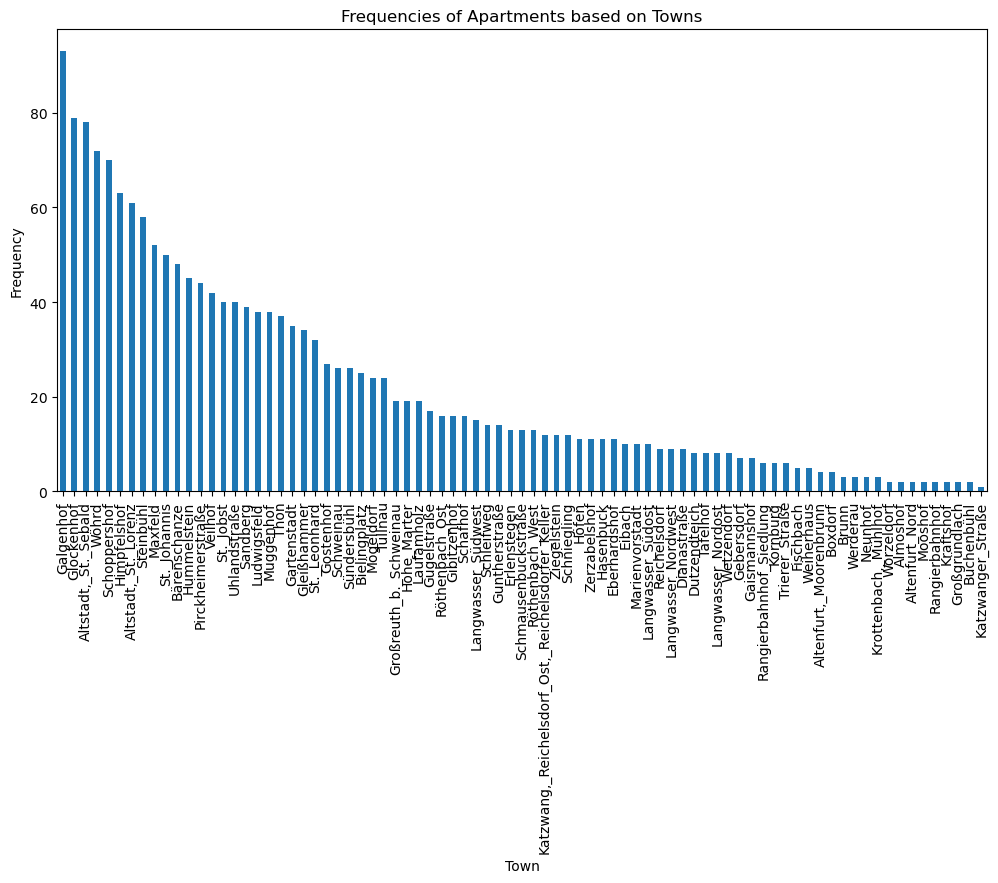

In [59]:
apartments_wrt_town_sorted = apartments_wrt_town.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
apartments_wrt_town_sorted.plot(kind='bar')
plt.title('Frequencies of Apartments based on Towns')
plt.xlabel('Town')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

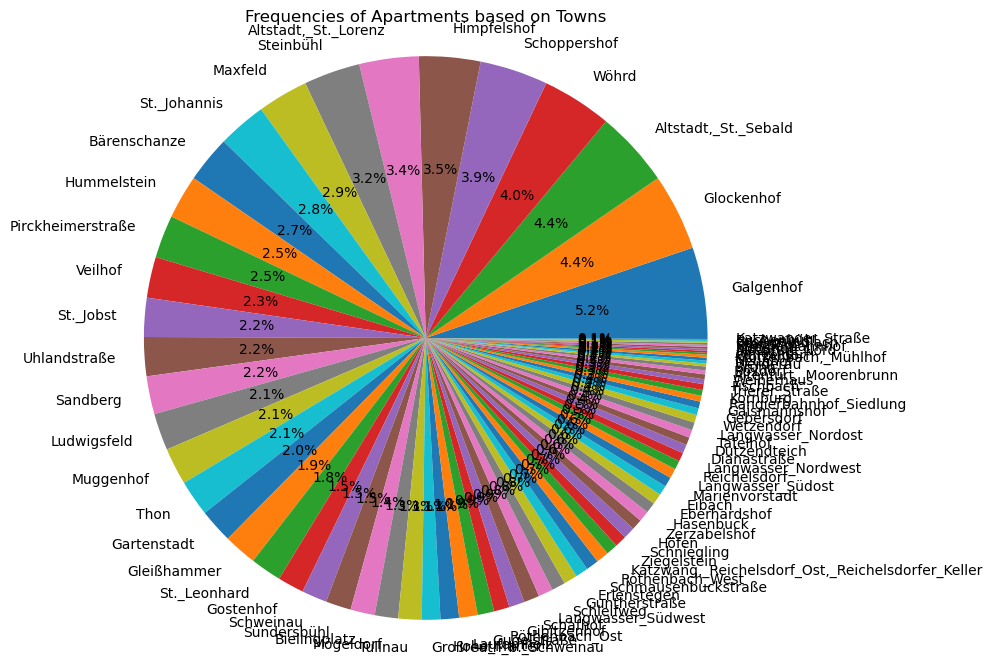

In [60]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(apartments_wrt_town_sorted.values, labels=apartments_wrt_town_sorted.index, autopct='%1.1f%%')
plt.title('Frequencies of Apartments based on Towns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Extract Latitude and Longitude from data

In [61]:
# Create an empty dictionary for street coordinates
street_coordinates = {}

# Extract latitude and longitude for streets in values list
for value in values:
    # Filter df_nuremberg_stops for the current street value
    filtered_df = df_nuremberg_stops[df_nuremberg_stops['stopName'].str.contains(value, case=False)]

    if not filtered_df.empty:
        # Extract the first latitude, longitude, and stop name
        latitude = filtered_df['latitude'].values[0]
        longitude = filtered_df['longitude'].values[0]
        stop_name = filtered_df['stopName'].values[0]

        # Save latitude, longitude, and stop name as a list in the street_coordinates dictionary
        street_coordinates[value] = [latitude, longitude, stop_name]

print("Actual Stops:",len(values))
print("Latitude/Longitude found for:",len(street_coordinates))


Actual Stops: 46
Latitude/Longitude found for: 41


In [62]:
# Prepare the data for the table
table_data = []
for value in values:
    if value in street_coordinates:
        freq = freq_nuremberg_stops[value]
        if freq > 0:
            coordinates = street_coordinates[value]
            latitude = coordinates[0]
            longitude = coordinates[1]
            table_data.append([value, freq, longitude, latitude])

# Define the table headers
headers = ["Stop Name", "Frequency", "Longitude", "Latitude"]

# Print the table with beautiful formatting
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒════════════════╤═════════════╤═════════════╤════════════╕
│ Stop Name      │   Frequency │   Longitude │   Latitude │
╞════════════════╪═════════════╪═════════════╪════════════╡
│ Wöhrd          │           2 │     11.0867 │    49.4526 │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Eibach         │           3 │     11.0474 │    49.41   │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Maxfeld        │           3 │     11.0849 │    49.4633 │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Sündersbühl    │           1 │     11.0449 │    49.4424 │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Gibitzenhof    │           1 │     11.0652 │    49.4254 │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Gleißhammer    │           3 │     11.1128 │    49.4443 │
├────────────────┼─────────────┼─────────────┼────────────┤
│ Thon           │           3 │     11.0639 │    49.473  │
├────────────────┼─────────────┼────────

In [63]:
scale_factor = 1

# Create a map centered on Nuremberg
nuremberg_map = folium.Map(location=[49.4521, 11.0767], zoom_start=12)

# Define a color palette for the circle markers
color_palette = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']

for x in range(len(apartments_wrt_town)):
    if apartments_wrt_town.index[x] in street_coordinates:
        # Get the street coordinates
        coordinates = street_coordinates[apartments_wrt_town.index[x]]
        latitude = [coordinates[0]]
        longitude = [coordinates[1]]
        freq = int(apartments_wrt_town.values[x])  # Convert frequency to integer

        # Iterate over the latitude and longitude values
        for lat, lon, street_name in zip(latitude, longitude, coordinates[2:]):
            # Define the circle's radius based on frequency (adjust the scale_factor to your liking)
            radius = freq * scale_factor

            # Create a circle marker at the current latitude and longitude
            location = [lat, lon]
            # Assign a color based on the index in the color palette
            color = color_palette[apartments_wrt_town.values[x] % len(color_palette)]
            circle_marker = folium.CircleMarker(location=location, radius=radius, color=color,
                                                fill=True, fill_color=color, fill_opacity=0.6)
            # Create a popup with the frequency and street name
            popup_text = f"Street: {street_name} <br> Frequency: {freq}"
            popup = folium.Popup(popup_text, max_width=200)
            # Add the popup to the circle marker
            circle_marker.add_child(popup)
            # Add the circle marker to the map
            circle_marker.add_to(nuremberg_map)


nuremberg_map.save('frequency_map.html')

nuremberg_map

In [75]:
selected_columns = ['federalState', 'zipCode', 'district', 'cityTown', 'street', 'houseNumber','latitude', 'longitude']
first_five_rows = df_immoscout[selected_columns].head(5)
print(first_five_rows)

print(len(df_immoscout))

  federalState  zipCode  district        cityTown               street  \
0       Bayern    90459  Nürnberg     Gugelstraße       no_information   
1       Bayern    90402  Nürnberg  Marienvorstadt       no_information   
2       Bayern    90489  Nürnberg           Wöhrd   Georg-Strobel-Str.   
3       Bayern    90451  Nürnberg          Eibach       no_information   
4       Bayern    90409  Nürnberg         Maxfeld  Gellertstra&szlig;e   

  houseNumber   latitude  longitude  
0           0  49.450159  11.083947  
1           0  49.450159  11.083947  
2           5  49.456003  11.092123  
3           0  49.450159  11.083947  
4           1  49.450159  11.083947  
1792


Problem: Optimal Location Selection: Analyzing the rental prices in proximity to public transport stops can help individuals or businesses identify the areas with affordable rents and convenient access to transportation. This information can be valuable for people looking for rental properties near public transport stops.

Solution:

Calculating Distance: The code uses the Haversine formula to calculate the distance between each rental property and all public transport stops. The haversine function takes latitude and longitude coordinates of two locations and returns the distance between them in meters.

Filtering by Proximity: The code filters the rental properties based on their proximity to public transport stops. It applies a proximity threshold (in this case, 500 meters) and selects only the rental properties that are within the specified distance of a public transport stop. The filtered properties are stored in the df_filtered DataFrame.

Analyzing Rental Prices: After filtering the rental properties, the code calculates various statistics related to rental prices within proximity to public transport stops. It calculates the mean (mean_rental_price), median (median_rental_price), and standard deviation (std_rental_price) of the rental prices for the filtered properties. These statistics provide insights into the affordability of rental properties near public transport stops.

Visualization: The code creates a map using the Folium library, centered around Nuremberg with a specified zoom level. It then adds markers to the map to represent the filtered rental properties (blue markers) and public transport stops (red markers). Each marker displays relevant information such as rental price or stop name as a popup when clicked.

By visualizing the rental properties and public transport stops on the map and providing information about rental prices, the code helps individuals or businesses identify optimal locations for rental properties near public transport stops. It allows users to assess the affordability and convenience of different areas, making it easier to make informed decisions when selecting a location.

In [74]:
# Step 2: Calculate Distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from decimal degrees to radians
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat/2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance * 1000  # Convert distance to meters

# Iterate over each row in the DataFrame
for index, row in df_immoscout.iterrows():
    # Initialize an empty list to store distances, stop names, latitudes, and longitudes
    distances = []
    stop_names = []
    stop_latitudes = []
    stop_longitudes = []

    # Calculate the distance between the rental property and all public transport stops
    for stop_index, stop_row in df_nuremberg_stops.iterrows():
        distance = haversine(row['latitude'], row['longitude'], stop_row['latitude'], stop_row['longitude'])
        distances.append(distance)
        stop_names.append(stop_row['stopName'])
        stop_latitudes.append(stop_row['latitude'])
        stop_longitudes.append(stop_row['longitude'])

    # Assign the minimum distance, corresponding stop name, latitude, and longitude to the respective columns
    min_distance_index = distances.index(min(distances))
    df_immoscout.at[index, 'distance_to_stop'] = min(distances)
    df_immoscout.at[index, 'stopName'] = stop_names[min_distance_index]
    df_immoscout.at[index, 'stopLatitude'] = stop_latitudes[min_distance_index]
    df_immoscout.at[index, 'stopLongitude'] = stop_longitudes[min_distance_index]

# Step 3: Filter by Proximity
proximity_threshold = 500  # meters
df_filtered = df_immoscout[df_immoscout['distance_to_stop'] <= proximity_threshold]

# Step 4: Analyze Rental Prices
mean_rental_price = df_filtered['totalRent'].mean()
median_rental_price = df_filtered['totalRent'].median()
std_rental_price = df_filtered['totalRent'].std()

print("mean_rental_price:", mean_rental_price)
print("median_rental_price:", median_rental_price)
print("std_rental_price:", std_rental_price)

mean_rental_price: 771.8260937499999
median_rental_price: 775.0
std_rental_price: 535.7256947365172


In [80]:
# Calculate the correlation
correlation = df_immoscout['totalRent'].corr(df_immoscout['distance_to_stop'])

# Print the correlation value
print("Correlation between total rent and distance:", correlation)

Correlation between total rent and distance: 0.02211301431069459


In [81]:
# Step 5: Create a map
nuremberg_map = folium.Map(location=[49.4521, 11.0767], zoom_start=12)

# Step 6: Add markers for rental listings (in blue color)
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"Rental Property: {row['totalRent']}",
                  icon=folium.Icon(color='blue')).add_to(nuremberg_map)

# Step 7: Add markers for public transport stops in proximity (in red color)
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['stopLatitude'], row['stopLongitude']],
                  popup=f"Stop Name: {row['stopName']}",
                  icon=folium.Icon(color='red')).add_to(nuremberg_map)

# Save the map as an HTML file
nuremberg_map.save('rental_map.html')

nuremberg_map